# GAN cifar10

![jupyter](https://media.geeksforgeeks.org/wp-content/uploads/20190625151115/gans_gfg1.jpg)


### Step 1: Importing the required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.layers import Input, Dense, Reshape, Flatten, Dropout 
from keras.layers import BatchNormalization, Activation, ZeroPadding2D 
from keras.layers.advanced_activations import LeakyReLU 
from keras.layers.convolutional import UpSampling2D, Conv2D 
from keras.models import Sequential, Model 
from keras.optimizers import Adam,SGD 

Using TensorFlow backend.
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

### Step 2: Loading the data

In [2]:
#Loading the CIFAR10 data 
(X, y), (_, _) = keras.datasets.cifar10.load_data() 

#Selecting a single class images 
#The number was randomly chosen and any number 
#between 1 to 10 can be chosen 
X = X[y.flatten() == 8] 
# X

### Step 3: Defining parameters to be used in later processes

In [5]:
#Defining the Input shape 
image_shape = (32, 32, 3) 

latent_dimensions = 100

### Step 4: Defining a utility function to build the Generator

In [6]:
def build_generator(): 

		model = Sequential() 

		#Building the input layer 
		model.add(Dense(128 * 8 * 8, activation="relu", 
						input_dim=latent_dimensions)) 
		model.add(Reshape((8, 8, 128))) 
		
		model.add(UpSampling2D()) 
		
		model.add(Conv2D(128, kernel_size=3, padding="same")) 
		model.add(BatchNormalization(momentum=0.78)) 
		model.add(Activation("relu")) 
		
		model.add(UpSampling2D()) 
		
		model.add(Conv2D(64, kernel_size=3, padding="same")) 
		model.add(BatchNormalization(momentum=0.78)) 
		model.add(Activation("relu")) 
		
		model.add(Conv2D(3, kernel_size=3, padding="same")) 
		model.add(Activation("tanh")) 


		#Generating the output image 
		noise = Input(shape=(latent_dimensions,)) 
		image = model(noise) 

		return Model(noise, image) 


### Step 5: Defining a utility function to build the Discriminator

In [7]:
def build_discriminator(): 

		#Building the convolutional layers 
		#to classify whether an image is real or fake 
		model = Sequential() 

		model.add(Conv2D(32, kernel_size=3, strides=2, 
						input_shape=image_shape, padding="same")) 
		model.add(LeakyReLU(alpha=0.2)) 
		model.add(Dropout(0.25)) 
		
		model.add(Conv2D(64, kernel_size=3, strides=2, padding="same")) 
		model.add(ZeroPadding2D(padding=((0,1),(0,1)))) 
		model.add(BatchNormalization(momentum=0.82)) 
		model.add(LeakyReLU(alpha=0.25)) 
		model.add(Dropout(0.25)) 
		
		model.add(Conv2D(128, kernel_size=3, strides=2, padding="same")) 
		model.add(BatchNormalization(momentum=0.82)) 
		model.add(LeakyReLU(alpha=0.2)) 
		model.add(Dropout(0.25)) 
		
		model.add(Conv2D(256, kernel_size=3, strides=1, padding="same")) 
		model.add(BatchNormalization(momentum=0.8)) 
		model.add(LeakyReLU(alpha=0.25)) 
		model.add(Dropout(0.25)) 
		
		#Building the output layer 
		model.add(Flatten()) 
		model.add(Dense(1, activation='sigmoid')) 

		image = Input(shape=image_shape) 
		validity = model(image) 

		return Model(image, validity) 


### Step 6: Defining a utility function to display the generated images

In [8]:
def display_images(): 
		r, c = 4,4
		noise = np.random.normal(0, 1, (r * c,latent_dimensions)) 
		generated_images = generator.predict(noise) 

		#Scaling the generated images 
		generated_images = 0.5 * generated_images + 0.5

		fig, axs = plt.subplots(r, c) 
		count = 0
		for i in range(r): 
			for j in range(c): 
				axs[i,j].imshow(generated_images[count, :,:,]) 
				axs[i,j].axis('off') 
				count += 1
		plt.show() 
		plt.close() 


### Step 7: Building the Generative Adversarial Network

In [9]:
# Building and compiling the discriminator 
discriminator = build_discriminator() 
discriminator.compile(loss='binary_crossentropy', 
					optimizer=Adam(0.0002,0.5), 
					metrics=['accuracy']) 

#Making the Discriminator untrainable 
#so that the generator can learn from fixed gradient 
discriminator.trainable = False

# Building the generator 
generator = build_generator() 

#Defining the input for the generator 
#and generating the images 
z = Input(shape=(latent_dimensions,)) 
image = generator(z) 


#Checking the validity of the generated image 
valid = discriminator(image) 

#Defining the combined model of the Generator and the Discriminator 
combined_network = Model(z, valid) 
combined_network.compile(loss='binary_crossentropy', 
						optimizer=Adam(0.0002,0.5)) 


Instructions for updating:
Colocations handled automatically by placer.


### Step 8: Training the network

Instructions for updating:
Use tf.cast instead.


/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


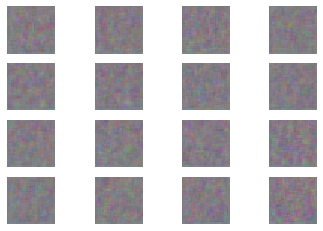

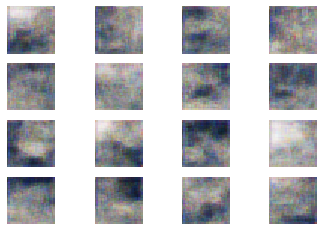

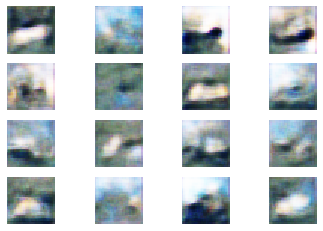

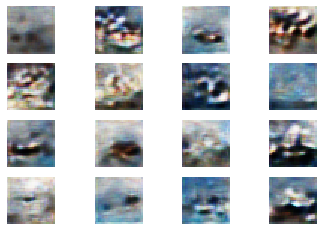

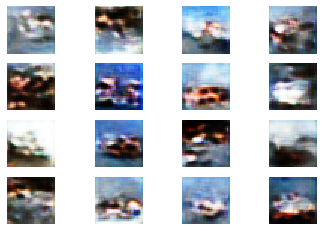

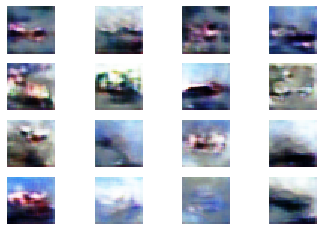

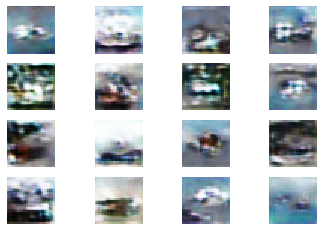

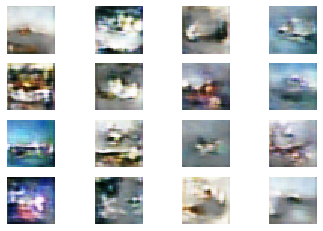

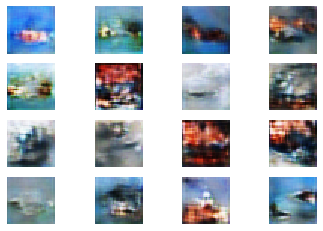

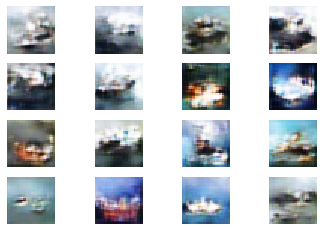

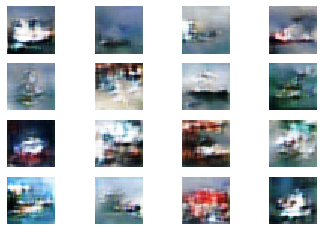

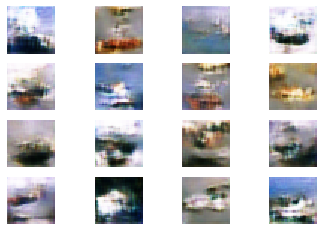

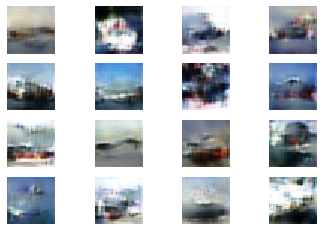

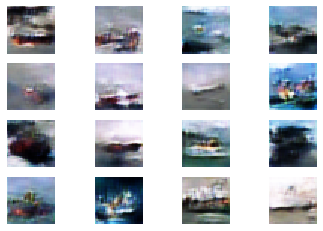

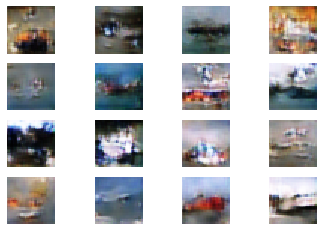

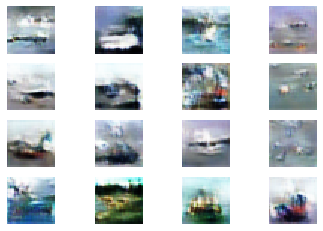

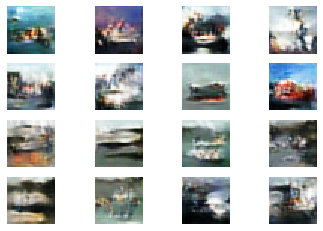

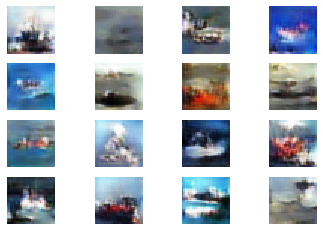

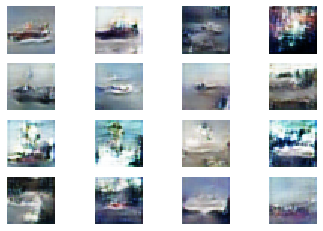

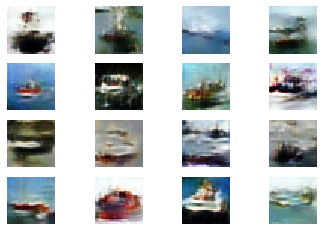

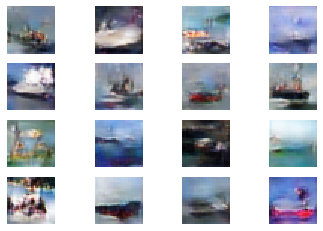

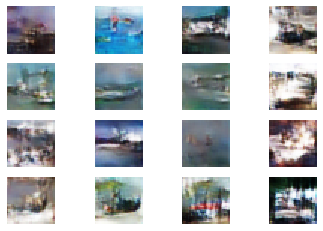

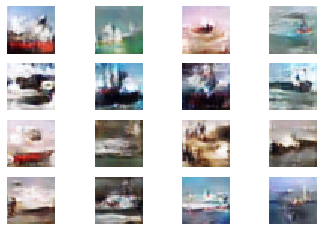

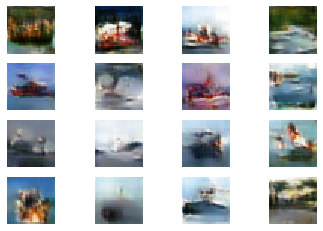

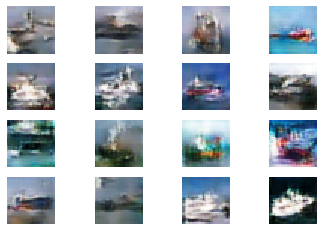

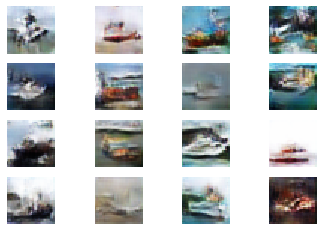

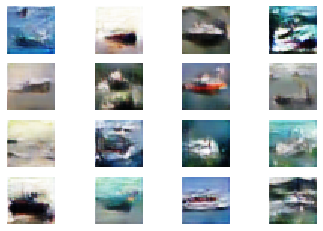

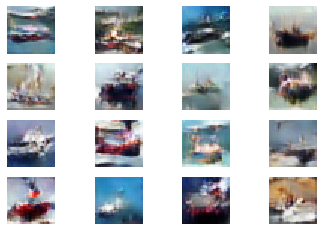

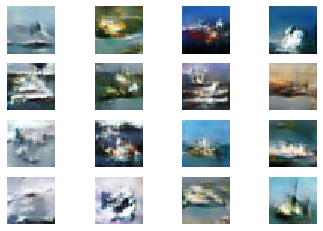

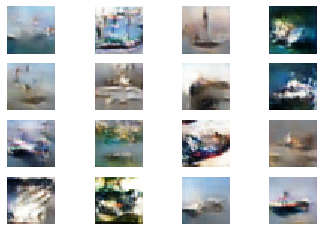

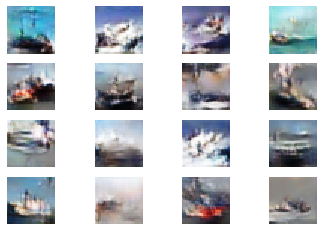

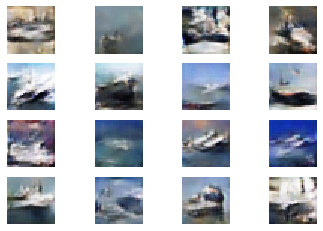

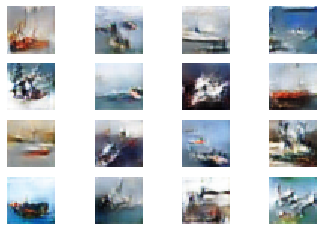

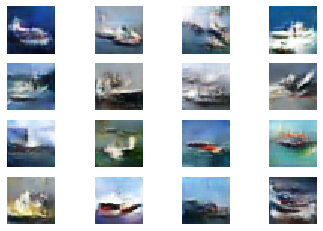

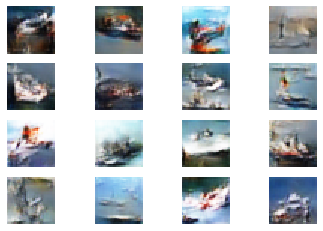

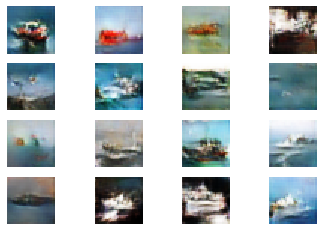

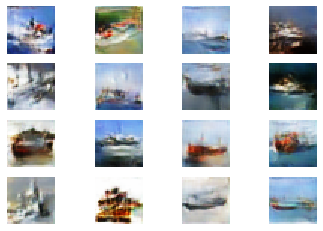

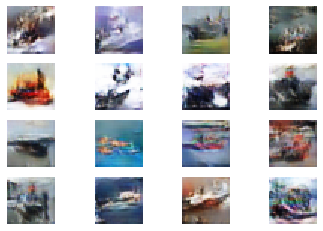

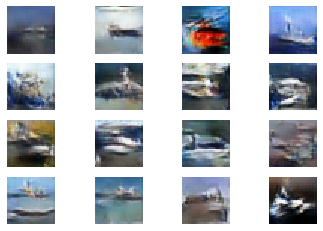

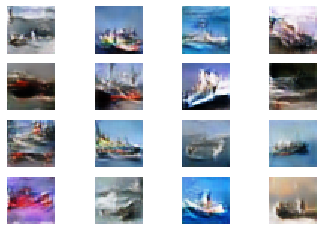

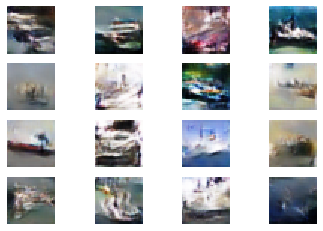

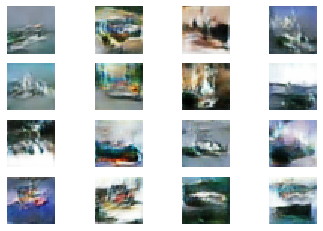

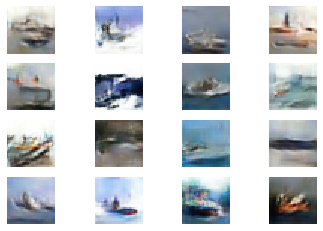

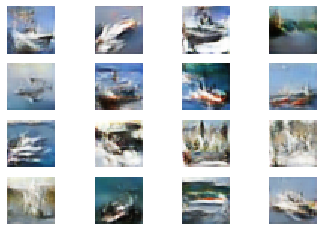

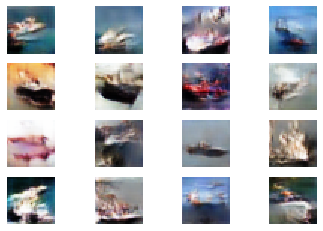

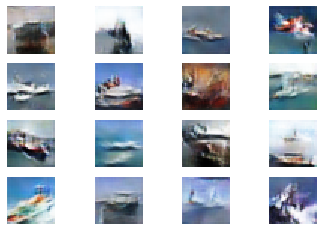

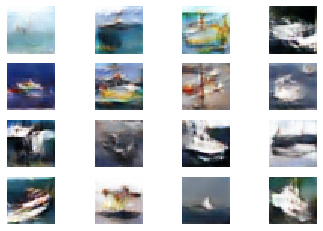

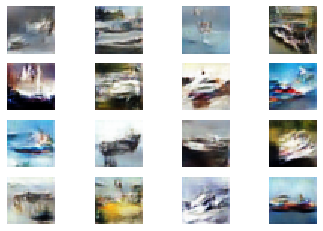

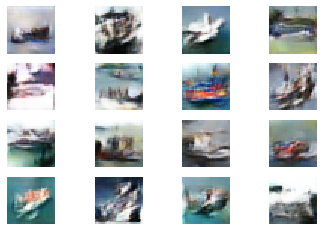

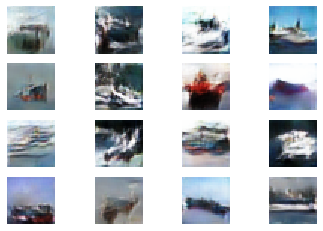

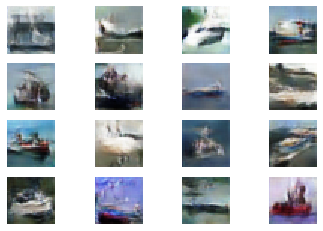

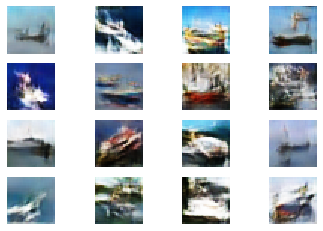

In [ ]:
num_epochs=15000
batch_size=32
display_interval=250
losses=[] 

#Normalizing the input 
X = (X / 127.5) - 1.
		

#Defining the Adversarial ground truths 
valid = np.ones((batch_size, 1)) 

#Adding some noise 
valid += 0.05 * np.random.random(valid.shape) 
fake = np.zeros((batch_size, 1)) 
fake += 0.05 * np.random.random(fake.shape) 

for epoch in range(num_epochs): 
			
			#Training the Discriminator 
			
			#Sampling a random half of images 
			index = np.random.randint(0, X.shape[0], batch_size) 
			images = X[index] 

			#Sampling noise and generating a batch of new images 
			noise = np.random.normal(0, 1, (batch_size, latent_dimensions)) 
			generated_images = generator.predict(noise) 
			

			#Training the discriminator to detect more accurately 
			#whether a generated image is real or fake 
			discm_loss_real = discriminator.train_on_batch(images, valid) 
			discm_loss_fake = discriminator.train_on_batch(generated_images, fake) 
			discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake) 
			
			#Training the Generator 

			#Training the generator to generate images 
			#which pass the authenticity test 
			genr_loss = combined_network.train_on_batch(noise, valid) 
			
			#Tracking the progress				 
			if epoch % display_interval == 0: 
				display_images() 



In [ ]:
https://www.geeksforgeeks.org/building-a-generative-adversarial-network-using-keras/